# Simple Modeling & Evaluation
I will train the data with the time series model. I will figure out trends, seasonality, and residuals. Also, I have to plot ACF and PACF to identify Auto Regressive and Moving Average. I will train the SARIMA Model to predict future song trends.

### Import Packages

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import itertools
import pickle
import matplotlib.pyplot as plt
import pandas as pd

### Load Data

In [3]:
# Load Dataset
with open('../data/final/dataset_dict.pickle', 'rb') as dataset:
    dataset_dict = pickle.load(dataset)
    dataset.close()

# Load Keys
with open('../data/final/top10_counts_dict.pickle', 'rb') as dict_:
    top10_counts_dict = pickle.load(dict_)
    dict_.close()

with open('../data/final/top10_growth_dict.pickle', 'rb') as dict_:
    top10_growth_dict = pickle.load(dict_)
    dict_.close()

### Model Training - pop

##### Train-Test Split

In [4]:
pop_train = top10_counts_dict["'pop'"].resample('W').sum()[:190]
pop_test = top10_counts_dict["'pop'"].resample('W').sum()[190:]

##### Decomposition

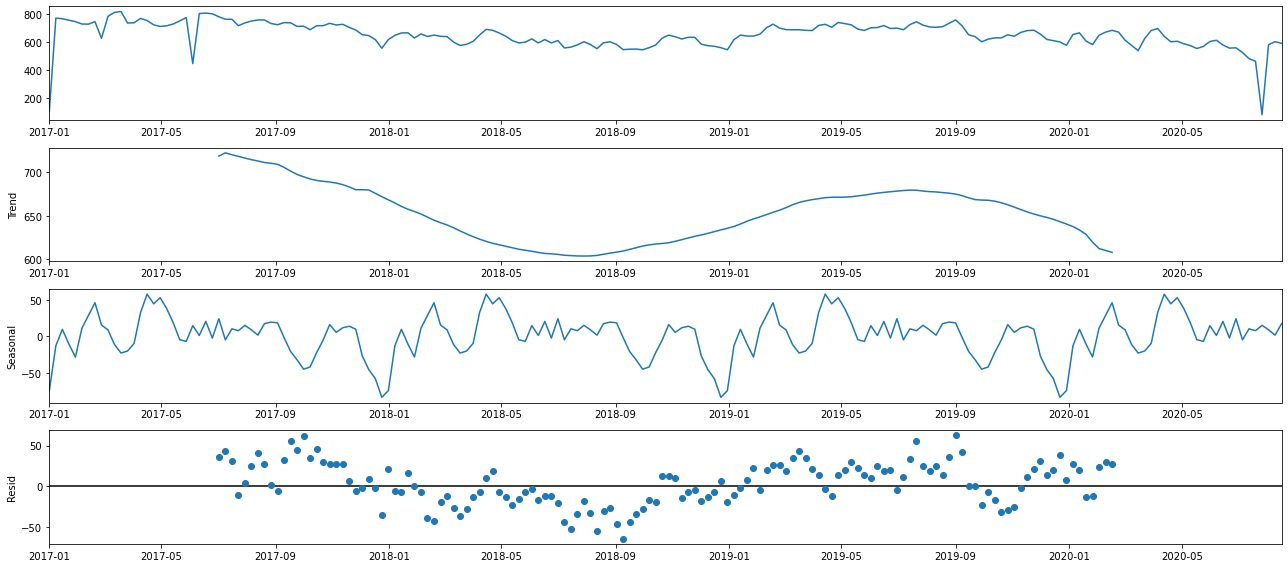

In [5]:
# Pop Decomposition
pop_decomposition = sm.tsa.seasonal_decompose(pop_train, model='additive')
fig = pop_decomposition.plot()
fig.set_size_inches((18,8))
fig.tight_layout()
plt.show()

##### ACF / PACF

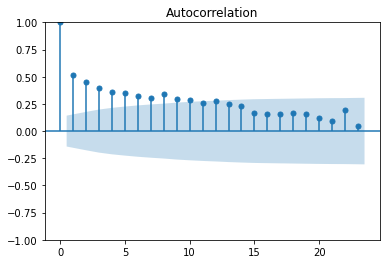

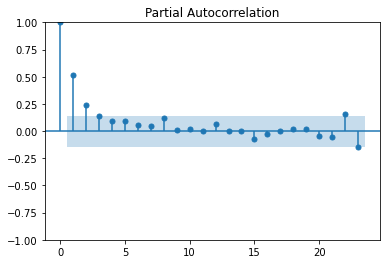

In [6]:
plot_acf(pop_train);
plot_pacf(pop_train, method='ywm');

##### Modeling

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08457D+00    |proj g|=  3.93963D-01

At iterate    5    f=  4.00651D+00    |proj g|=  9.62543D-02

At iterate   10    f=  3.98059D+00    |proj g|=  4.58223D-02

At iterate   15    f=  3.97260D+00    |proj g|=  1.03697D-02

At iterate   20    f=  3.97104D+00    |proj g|=  8.85760D-03

At iterate   25    f=  3.97083D+00    |proj g|=  4.45844D-03

At iterate   30    f=  3.97054D+00    |proj g|=  1.41202D-02

At iterate   35    f=  3.96712D+00    |proj g|=  1.97612D-02

At iterate   40    f=  3.96345D+00    |proj g|=  1.69692D-02

At iterate   45    f=  3.96244D+00    |proj g|=  8.11693D-03

At iterate   50    f=  3.96182D+00    |proj g|=  8.17653D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/yeon/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


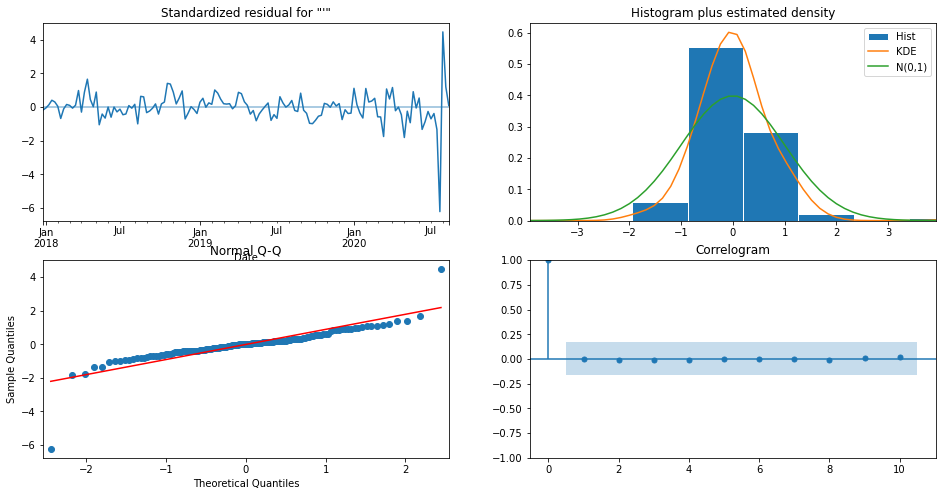

In [12]:
model = sm.tsa.statespace.SARIMAX(pop_train, order=(3, 1, 10), 
                                  seasonal_order=(2, 1, 1, 16),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False
                                  )
results = model.fit();
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Save Simple Model

In [13]:
with open('../models/simple_model.pickle', 'wb') as simple_model:
    pickle.dump(results, simple_model)
    simple_model.close()

### Evaluation

##### Test

<AxesSubplot:xlabel='Date'>

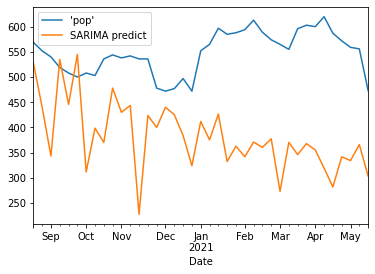

In [39]:
preds = results.predict(start=pd.to_datetime('2020-08-23'), end=pd.to_datetime('2021-05-16'))
pop_test['SARIMA predict'] = preds;
pop_test.plot()

##### Long Term Prediction

In [42]:
long_preds = results.predict(start=pd.to_datetime('2020-08-23'), end=pd.to_datetime('2025-05-16'))

<AxesSubplot:>

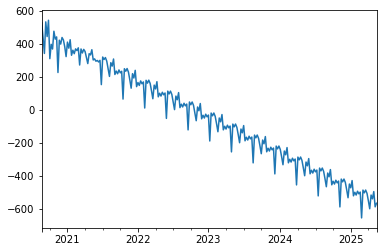

In [43]:
long_preds.plot()